<div class="alert alert-danger">
    This session will be recorded.
</div>

# "Isochrones" with OSM


How far can you travel on foot in 15 minutes?

<img src="images/isos.png" width=800>



## What is open street map?

![osm](images/OSM.png)

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the OpenStreetMap Wiki.

OSM has a large userbase with more than 7 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 6.5 billion nodes and counting! (stats from January 2021).

OpenStreetMap is used not only for integrating the OSM maps as background maps to visualizations or online maps, but also for many other purposes such as routing, geocoding, education, and research. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development. Read more about humanitarian projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org/).


- https://www.openstreetmap.org/
- [OSM stats](https://wiki.openstreetmap.org/wiki/Stats)

## OSMnx

<a href="https://www.spur.org/publications/urbanist-article/2012-11-09/grand-reductions-10-diagrams-changed-city-planning" target="_blank"><img src="https://www.spur.org/sites/default/files/migrated/images/F22.jpg" width=400></a>

[[Image source]](https://www.spur.org/publications/urbanist-article/2012-11-09/grand-reductions-10-diagrams-changed-city-planning)

Allan Jacobs’ seminal treatise Great Streets (1993) takes figure-ground analysis to a new level, showing 50 one-mile-square maps of cities around the world, all drawn to the same scale.


This week we will explore a Python module called OSMnx that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called NetworkX.

<img src="https://i2.wp.com/geoffboeing.com/wp-content/uploads/2017/04/square-mile-street-networks.jpg?resize=768%2C617&ssl=1" width=400>

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  

## What's an isochrone map?

<img src="https://www.tandfonline.com/na101/home/literatum/publisher/tandf/journals/content/cppr20/2017/cppr20.v032.i04/02697459.2017.1329487/20171208/images/large/cppr_a_1329487_f0001_oc.jpeg" width=800>

- [Isochrone Mapping of Urban Transport: Car-dependency, Mode-choice and Design Research](https://www.tandfonline.com/doi/figure/10.1080/02697459.2017.1329487?scroll=top&needAccess=true)


## Import the libraries

In [1]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Download and prep the street network

When fetching network data from OpenStreetMap using `OSMnx`, it is possible to define the type of street network using the `network_type` parameter (options: `drive`, `walk` and `bike`). Below, we define the parameters that will determine the results of this lab.

There are several methods to bring in Open Street Map data using OSMNX. Choose one that best suits your needs:

Query type | Example scenario| OSMNX command
---|---|---
You have an address and specified distance buffer | 1 kilometer buffer from UCLA | [osmnx.graph.graph_from_address](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_address)
You have a specific lat/lon coordinate pair and specified distance buffer| 1 kilometer buffer from `[34.12,-118.55]` | [osmnx.graph.graph_from_point](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_point)
You have a general location or address that has defined boundaries | a neighborhood, zipcode, village, or small city | [osmnx.graph.graph_from_place](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_place)


<div class="alert alert-danger">
<h1>Warning!</h1>
    Be very careful about what you enter in the "place" variable below. The larger the place, the more data it will download from OpenStreetMap, which can result in overloading your JupyterHub's capacity. 
</div>

In [2]:
# configure the place, network type, trip times, and travel speed
address = 'Boyle Heights, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [3]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# download the street network
G = ox.graph_from_address(address, network_type=network_type, dist = 2000)

CPU times: user 4.38 s, sys: 222 ms, total: 4.6 s
Wall time: 4.74 s


In [4]:
# what is G?
type(G)

networkx.classes.multidigraph.MultiDiGraph

- [Networkx multidigraph](https://networkx.org/documentation/stable/reference/classes/multidigraph.html)

Quick plot to visualize data.

- [plot_graph](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=plot_graph#osmnx.plot.plot_graph)

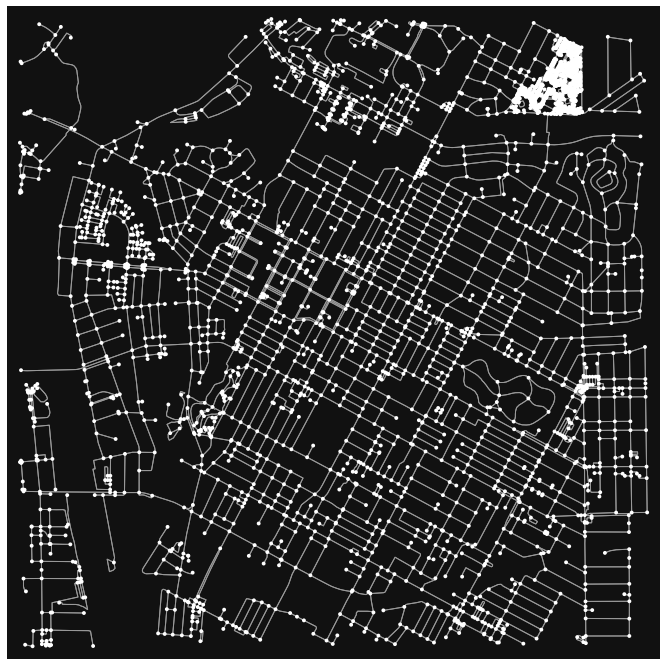

In [5]:
# quick plot using oxmnx
fig, ax = ox.plot_graph(G,figsize=(12,12))

## Project to web mercator

![projections](https://www.esri.com/arcgis-blog/wp-content/uploads/2022/02/grid2.png)

In order to conduct spatial analysis, it is recommended to use a projected coordinate system, rather than a geographic coordinate system (which uses angular measurements). Here is a [blog post from ESRI](https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/gcs_vs_pcs/) that describes the differences between the two.

In [6]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(G, to_crs='epsg:3857')

## Convert edges and nodes to geodataframes

OSMnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let’s extract the nodes and edges from the graph as GeoDataFrames:

In [7]:
# convert nodes and edges to geodataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [8]:
gdf_nodes.sample(10)

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
1832218403,4.036486e+06,-1.315731e+07,NaN,3,-118.194170,34.057208,POINT (-13157314.808 4036486.252)
7152308707,4.032839e+06,-1.316100e+07,NaN,3,-118.227311,34.030061,POINT (-13161004.070 4032839.252)
2274099028,4.036835e+06,-1.315723e+07,NaN,3,-118.193399,34.059805,POINT (-13157229.047 4036835.220)
6729087880,4.033636e+06,-1.315758e+07,NaN,1,-118.196541,34.035990,POINT (-13157578.724 4033635.628)
4279765580,4.034739e+06,-1.315831e+07,NaN,3,-118.203116,34.044207,POINT (-13158310.661 4034739.452)
604238296,4.034715e+06,-1.316002e+07,NaN,3,-118.218439,34.044027,POINT (-13160016.443 4034715.337)
3219718729,4.034095e+06,-1.315785e+07,NaN,3,-118.198934,34.039406,POINT (-13157845.123 4034094.504)
2264112096,4.036429e+06,-1.315732e+07,NaN,4,-118.194203,34.056782,POINT (-13157318.459 4036429.012)
6206425595,4.036252e+06,-1.315914e+07,NaN,3,-118.210524,34.055463,POINT (-13159135.327 4036251.812)


In [9]:
gdf_nodes

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
14941481,4.036783e+06,-1.315848e+07,stop,3,-118.204655,34.059417,POINT (-13158481.982 4036783.097)
8772109642,4.036793e+06,-1.315848e+07,crossing,4,-118.204605,34.059495,POINT (-13158476.416 4036793.498)
604238739,4.036724e+06,-1.315839e+07,NaN,4,-118.203870,34.058981,POINT (-13158394.652 4036724.445)
15373745,4.036812e+06,-1.315854e+07,NaN,3,-118.205136,34.059632,POINT (-13158535.560 4036812.014)
14941485,4.036619e+06,-1.315836e+07,NaN,3,-118.203524,34.058197,POINT (-13158356.146 4036619.141)
...,...,...,...,...,...,...,...
9071150194,4.035880e+06,-1.316144e+07,crossing,1,-118.231200,34.052697,POINT (-13161436.969 4035880.142)
9094953801,4.034209e+06,-1.316140e+07,crossing,3,-118.230882,34.040262,POINT (-13161401.558 4034209.457)
9109614219,4.034207e+06,-1.316140e+07,NaN,3,-118.230886,34.040247,POINT (-13161402.037 4034207.456)


<AxesSubplot:>

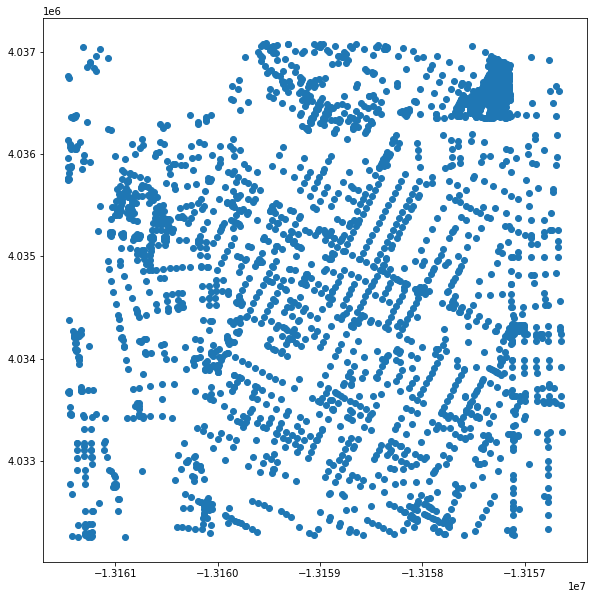

In [10]:
gdf_nodes.plot(figsize=(10,10))

In [11]:
gdf_edges.head()

osmid              name      highway  oneway  \
u          v          key                                                     
14941481   8772109642 0    161709222  San Pablo Street  residential   False   
           604238739  0    161709223      Zonal Avenue  residential   False   
           15373745   0    161709223      Zonal Avenue  residential   False   
8772109642 14941481   0    161709222  San Pablo Street  residential   False   
           8772216945 0    947706656               NaN      footway   False   

                           length  \
u          v          key           
14941481   8772109642 0     9.762   
           604238739  0    87.618   
           15373745   0    50.384   
8772109642 14941481   0     9.762   
           8772216945 0     9.079   

                                                                    geometry  \
u          v          key                                                      
14941481   8772109642 0    LINESTRING (-13158481.982 4036783.097, -131584...   
           604238739  0    LINESTRING (-13158481.982 4036783.097, -131584...   
           15373745   0    LINESTRING (-13158481.982 4036783.097, -131584...   
8772109642 14941481   0    LINESTRING (-13158476.416 4036793.498, -131584...   
           8772216945 0    LINESTRING (-13158476.416 4036793.498, -131584...   

                          lanes bridge access maxspeed service tunnel  
u          v          key                                              
14941481   8772109642 0     NaN    NaN    NaN      NaN     NaN    NaN  
           604238739  0     NaN    NaN    NaN      NaN     NaN    NaN  
           15373745   0     NaN    NaN    NaN      NaN     NaN    NaN  
8772109642 14941481   0     NaN    NaN    NaN      NaN     NaN    NaN  
           8772216945 0     NaN    NaN    NaN      NaN     NaN    NaN

<AxesSubplot:>

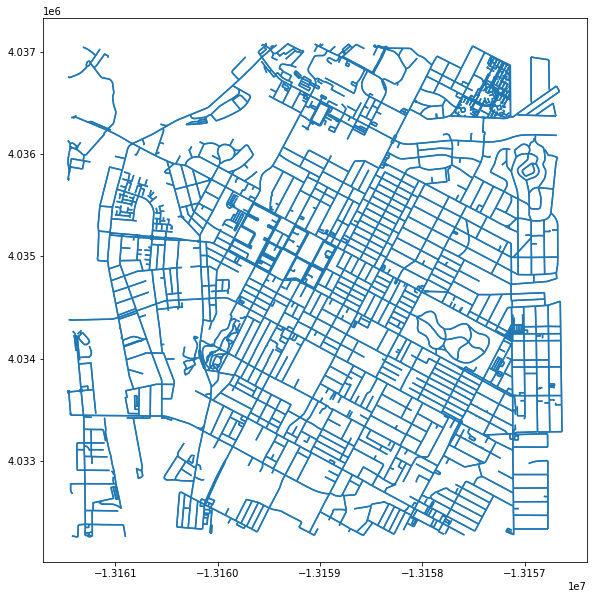

In [12]:
gdf_edges.plot(figsize=(10,10))

There are many columns in our GeoDataFrame. Most of the columns are fairly self-explanatory but the following table describes all of them.

Most of the attributes come directly from the OpenStreetMap, however, columns `u` and `v` are Networkx specific ids. You can click on the links to get more information about each attribute:


| Column                                                     | Description                 | Data type         |
|------------------------------------------------------------|-----------------------------|-------------------|
| [bridge](http://wiki.openstreetmap.org/wiki/Key:bridge)    | Bridge feature              | boolean           |
| geometry                                                   | Geometry of the feature     | Shapely.geometry  |
| [highway](http://wiki.openstreetmap.org/wiki/Key:highway)  | Tag for roads (road type)   | str / list        |
| [lanes](http://wiki.openstreetmap.org/wiki/Key:lanes)      | Number of lanes             | int (or nan)      |
| [length](http://wiki.openstreetmap.org/wiki/Key:length)    | Length of feature (meters)  | float             |
| [maxspeed](http://wiki.openstreetmap.org/wiki/Key:maxspeed)| maximum legal speed limit   | int /list         |
| [name](http://wiki.openstreetmap.org/wiki/Key:name)        | Name of the (street) element| str (or nan)      |
| [oneway](http://wiki.openstreetmap.org/wiki/Key:oneway)    | One way road                | boolean           |
| [osmid](http://wiki.openstreetmap.org/wiki/Node)           | Unique ids for the element  | list              |
| [u](http://ow.ly/bV8n30h7Ufm)                              | The first node of edge      | int               |
| [v](http://ow.ly/bV8n30h7Ufm)                              | The last node of edge       | int               |


Let's take a look what kind of features we have in the `highway` column:

In [13]:
gdf_edges['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential                    2588
footway                        2226
service                        1968
secondary                       642
primary                         414
tertiary                        324
unclassified                     26
pedestrian                       22
[steps, footway]                 22
steps                            18
[residential, service]           16
[footway, residential]           10
[path, footway]                   4
[residential, primary]            4
[unclassified, service]           4
[residential, tertiary]           2
[footway, service]                2
[track, residential]              2
[steps, residential]              2
secondary_link                    2
primary_link                      2
[unclassified, residential]       2
Name: highway, dtype: int64

## Analyzing the network properties

Now as we have seen some of the basic functionalities of OSMnx such as downloading the data and converting data from graph to GeoDataFrame, we can take a look some of the analytical features of omsnx. Osmnx includes many useful functionalities to extract information about the network.

To calculate some of the basic street network measures we can use [basic_stats()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.stats.basic_stats) function in OSMnx:

In [14]:
# Calculate network statistics
stats = ox.basic_stats(G, circuity_dist='euclidean')
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 3178,
 'm': 8302,
 'k_avg': 5.224669603524229,
 'edge_length_total': 511181.3260000003,
 'edge_length_avg': 61.573274632618684,
 'streets_per_node_avg': 2.6598489616110763,
 'streets_per_node_counts': {0: 0,
  1: 815,
  2: 1,
  3: 1826,
  4: 527,
  5: 6,
  6: 2,
  7: 0,
  8: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2564505978602895,
  2: 0.00031466331025802394,
  3: 0.5745752045311516,
  4: 0.1658275645059786,
  5: 0.0018879798615481435,
  6: 0.0006293266205160479,
  7: 0.0,
  8: 0.00031466331025802394},
 'intersection_count': 2363,
 'street_length_total': 255590.66299999983,
 'street_segment_count': 4151,
 'street_length_avg': 61.573274632618606,
 'circuity_avg': 0.87906338045249,
 'self_loop_proportion': 0.003372681281618887}

## Get the centroid

For this lab, we will use the centroid of the street network as the point from which to conduct our travel isochrone maps. Note that this needs to be somewhere within the street network to build the isochrone, and does not necessarily have to be the centroid.

- [geopandas `total_bounds`](https://geopandas.readthedocs.io/en/latest/docs/reference/api/geopandas.GeoSeries.total_bounds.html)

In [15]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13161466.034264782
4032254.5050112023
-13156635.280434012
4037085.3525244235


In [16]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13159050.657349396
4034669.928767813


## Get the nearest node to the centroid

Let's now find the nearest graph node (and its node ID) to the centroid point using OSMnx [distance.nearest_nodes](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.nearest_nodes). 


In [17]:
# use osmnx's distance.nearest_nodes command to get the id for the nearest node
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 123198423


In [18]:
# what is this record?
gdf_nodes.loc[[center_node]]

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
123198423,4.034673e+06,-1.315905e+07,traffic_signals,4,-118.209789,34.043715,POINT (-13159053.552 4034673.448)


Why `loc` and not `iloc`? The differences are confusing...

-  loc gets rows (or columns) with particular labels from the index
-  iloc gets rows (or columns) at particular positions in the index (so it only takes integers)

In this case, although the index is numeric, it does not represent a cumulative position in the dataframe, but rather is a reference to the OSM ID for that node. Therefore, we must use `loc` instead of `iloc`.

## Map the network layers

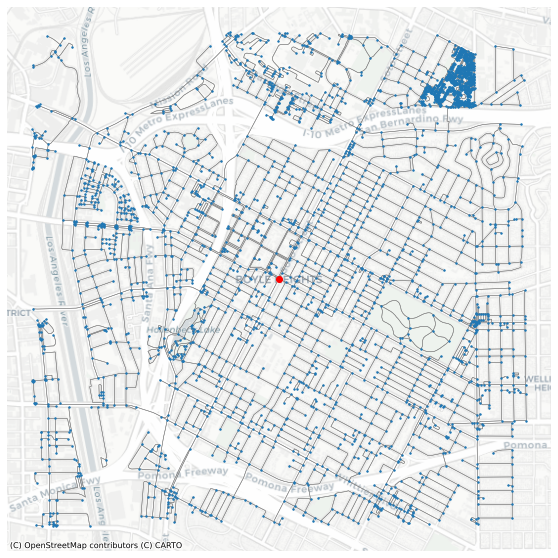

In [19]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

# Create isochrones

How far can you walk in 5, 10, 15, and 20 minutes from the central node? 

## Calculating travel cost

Now comes the fun part. We have thus far:

- downloaded nodes and edges for our place of interest
- reprojected them to web mercator for spatial analysis
- converted the data to geodataframes
- determined the centroid of the network
- determined the node closest to the centroid to conduct create isochrone maps

In order to create isochrone maps, we need to associate a **cost** to each edge in our network. In other words, we need an attribute that tells us exactly how long it would take an average person to traverse the distance of each edge in our network.

In [20]:
# a quick look at the data
gdf_edges[['osmid','name','highway','length']].sample(5)

,,,osmid,name,highway,length
u,v,key,,,,
5544253264,5544253263,0,578702716,NaN,service,104.119
7595077746,7595077743,0,813113227,NaN,service,25.018
122859549,122859545,0,13326787,Fairmount Street,residential,159.482
2280385938,2280385939,0,218831309,NaN,footway,8.768
9054340939,9054340938,0,978524546,NaN,footway,7.268


In [21]:
# create a new column, calculate the time it takes to travel that edge
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

Now let's do a spot check. If a person travels 75 meters per minute, do the numbers in the new `walk_time` column make sense?

In [22]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

,,,osmid,name,highway,length,walk_time
u,v,key,,,,,
2274019972,2274057899,0,218117798,NaN,footway,12.545,0.167267
5511141605,5511141255,0,"[574012078, 574012079]",NaN,footway,22.522,0.300293
3413775190,3413775192,0,334267210,NaN,service,27.877,0.371693
4749829568,1437216565,0,399284182,East 1st Street,secondary,13.354,0.178053
122903027,122608680,0,13334649,Norfolk Street,residential,108.853,1.451373
2280383749,2280383747,0,218830900,NaN,footway,1.139,0.015187
2280383739,2280383742,0,218830898,NaN,footway,6.801,0.090680
6820242409,6820242412,0,"[727786082, 727786083]",NaN,service,48.396,0.645280
269607559,4749829545,0,24816768,East 1st Street,secondary,9.543,0.127240


## Choosing colors (cmap) for our isochrones

- https://matplotlib.org/examples/color/colormaps_reference.html

OSMnx has included a super handy utility [`get_colors`](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=get_colors#osmnx.plot.get_colors) to extract colors from existing cmap color bands. The way it works is that you ask for any number of colors (since we have 4 travel times, we want 4 colors), give it a cmap name, and it returns you a list of colors. 

In [23]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [24]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [25]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

What are zipped lists in python?

- https://towardsdatascience.com/zip-function-in-python-da91c248385d

In [26]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


## Color each node based on travel time from point of interest

Now that we have determined the color for each travel time, let's loop through each time/color, and assign the nodes that fall within that travel time. To do so, we use a feature from [NetworkX called `ego_graph`.](https://networkx.org/documentation/stable//reference/generated/networkx.generators.ego.ego_graph.html) The ego graph determines which nodes fall within a given "radius", which in our case is determined by time.

The following loop does:

- loops through each time/color
- creates an ego graph for each time/color
- assigns the time/color in the geodataframe to each node that falls within

In [27]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 1102 nodes within 20 minutes 
There are 663 nodes within 15 minutes 
There are 307 nodes within 10 minutes 
There are 71 nodes within 5 minutes 


In [28]:
# spot check
gdf_nodes.sample(10)

,y,x,highway,street_count,lon,lat,geometry,time,color
osmid,,,,,,,,,
6471671425,4.032334e+06,-1.315967e+07,NaN,3,-118.215317,34.026302,POINT (-13159668.848 4032334.356),20 mins,#0d0887
2280385930,4.036499e+06,-1.315762e+07,NaN,1,-118.196946,34.057303,POINT (-13157623.898 4036499.030),NaN,NaN
2274034456,4.036720e+06,-1.315717e+07,NaN,1,-118.192911,34.058945,POINT (-13157174.724 4036719.675),NaN,NaN
604319670,4.035261e+06,-1.316060e+07,NaN,1,-118.223692,34.048091,POINT (-13160601.137 4035261.288),NaN,NaN
2278373091,4.036517e+06,-1.315741e+07,NaN,1,-118.194985,34.057433,POINT (-13157405.567 4036516.525),NaN,NaN
6729087868,4.033432e+06,-1.315747e+07,NaN,1,-118.195595,34.034473,POINT (-13157473.505 4033431.807),20 mins,#0d0887
604238498,4.034550e+06,-1.315832e+07,NaN,4,-118.203226,34.042794,POINT (-13158322.940 4034549.636),10 mins,#ed7953
2274022819,4.036616e+06,-1.315715e+07,NaN,1,-118.192725,34.058173,POINT (-13157153.985 4036615.876),NaN,NaN
123177163,4.036897e+06,-1.315720e+07,NaN,3,-118.193179,34.060266,POINT (-13157204.535 4036897.178),NaN,NaN


In [29]:
# the NaN values then need to be populated with a valid color
gdf_nodes['color'].fillna('#cccccc', inplace=True)

In [30]:
# another spot check: are all values in the color column populated?
gdf_nodes.sample(10)

,y,x,highway,street_count,lon,lat,geometry,time,color
osmid,,,,,,,,,
6735433784,4.034423e+06,-1.315877e+07,NaN,1,-118.207249,34.041849,POINT (-13158770.711 4034422.777),10 mins,#ed7953
4279685815,4.033373e+06,-1.315950e+07,NaN,4,-118.213800,34.034035,POINT (-13159500.065 4033373.051),15 mins,#9c179e
122945896,4.035984e+06,-1.315889e+07,NaN,1,-118.208333,34.053467,POINT (-13158891.493 4035983.667),15 mins,#9c179e
6731223581,4.034501e+06,-1.315928e+07,NaN,1,-118.211827,34.042435,POINT (-13159280.343 4034501.421),5 mins,#f0f921
2274091506,4.036760e+06,-1.315727e+07,NaN,3,-118.193754,34.059247,POINT (-13157268.488 4036760.187),NaN,#cccccc
6793111287,4.032321e+06,-1.315713e+07,NaN,1,-118.192477,34.026205,POINT (-13157126.311 4032321.260),NaN,#cccccc
122887001,4.032919e+06,-1.315945e+07,NaN,3,-118.213354,34.030656,POINT (-13159450.428 4032919.067),20 mins,#0d0887
122688508,4.036497e+06,-1.315937e+07,NaN,3,-118.212606,34.057289,POINT (-13159367.139 4036497.149),20 mins,#0d0887
2264099890,4.036375e+06,-1.315727e+07,NaN,1,-118.193754,34.056381,POINT (-13157268.510 4036375.185),NaN,#cccccc


<AxesSubplot:>

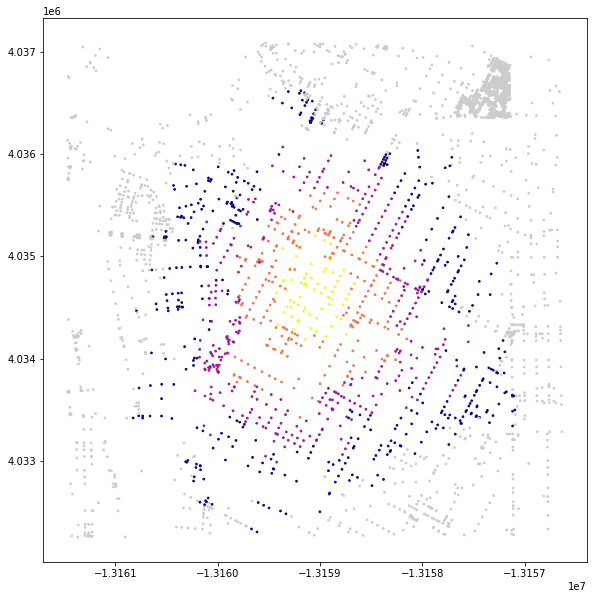

In [31]:
# map it
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

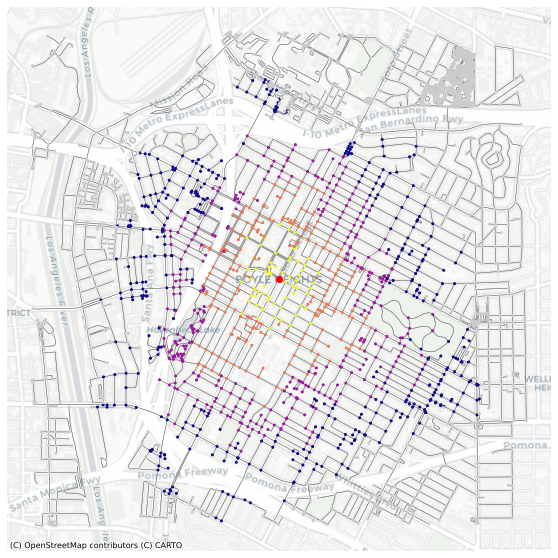

In [32]:
# a "full" map
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax,
               color=gdf_nodes['color'],
               markersize=4, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

## Create polygons for each time area

In [33]:
# show only the points within 5 minutes
gdf_nodes[gdf_nodes['time']=='5 mins']

,y,x,highway,street_count,lon,lat,geometry,time,color
osmid,,,,,,,,,
7883065477,4.034285e+06,-1.315926e+07,NaN,3,-118.211621,34.040827,POINT (-13159257.422 4034285.426),5 mins,#f0f921
4279710623,4.035122e+06,-1.315890e+07,NaN,3,-118.208368,34.047054,POINT (-13158895.322 4035121.980),5 mins,#f0f921
122584143,4.035075e+06,-1.315937e+07,NaN,4,-118.212607,34.046704,POINT (-13159367.261 4035074.931),5 mins,#f0f921
122584150,4.035001e+06,-1.315923e+07,NaN,4,-118.211389,34.046155,POINT (-13159231.596 4035001.240),5 mins,#f0f921
6807291193,4.035081e+06,-1.315919e+07,NaN,3,-118.211003,34.046752,POINT (-13159188.649 4035081.353),5 mins,#f0f921
...,...,...,...,...,...,...,...,...,...
6787986009,4.034981e+06,-1.315889e+07,NaN,3,-118.208310,34.046005,POINT (-13158888.932 4034981.034),5 mins,#f0f921
6735930775,4.034975e+06,-1.315891e+07,NaN,4,-118.208479,34.045957,POINT (-13158907.712 4034974.612),5 mins,#f0f921
7377591988,4.034602e+06,-1.315919e+07,NaN,1,-118.211053,34.043182,POINT (-13159194.237 4034601.735),5 mins,#f0f921


In [34]:
# put it in a variable
gdf_5 = gdf_nodes[gdf_nodes['time']=='5 mins']

<AxesSubplot:>

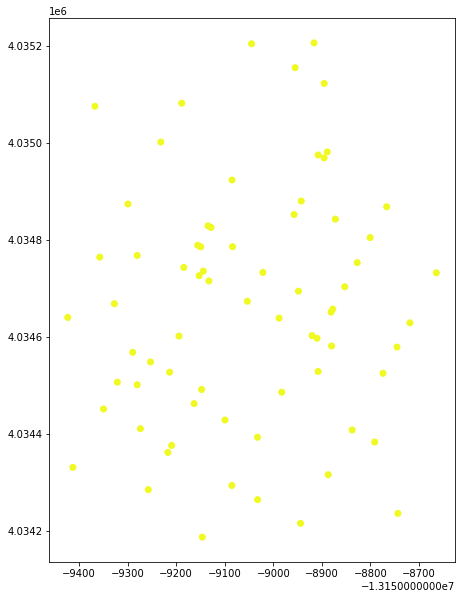

In [35]:
# plot it
gdf_5.plot(figsize=(10,10),color=gdf_5.color)

Points are great, but polygons are visually more informative. For this, we create a [convex hull](https://medium.com/@harshitsikchi/convex-hulls-explained-baab662c4e94).

![convex hull](https://miro.medium.com/max/1489/1*F4IUmOJbbLMJiTgHxpoc7Q.png)

[source](https://miro.medium.com/max/1489/1*F4IUmOJbbLMJiTgHxpoc7Q.png)

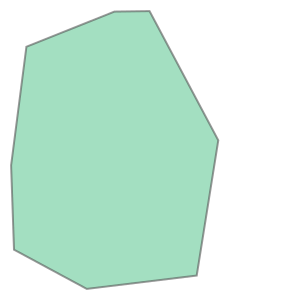

In [36]:
# combine all the points (unary_union) and create a convex hull polygon
gdf_5.unary_union.convex_hull

## Dissolve to the rescue!

Now that we understand the process of how the isochrones will be created (from points to convex hulls), let's apply this to each of our travel times. The `dissolve` function is a handy geopandas tool that collapses and groups our data based on a given category. We can use this to create grouped points per time period.

- https://geopandas.org/aggregation_with_dissolve.html

In [37]:
# dissolve the nodes by time
isochrones = gdf_nodes.dissolve("time")
isochrones

,geometry,y,x,highway,street_count,lon,lat,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13159896.552 4034051.167, -131598...",4.034255e+06,-1.315927e+07,traffic_signals,4,-118.211756,34.040602,#ed7953
15 mins,"MULTIPOINT (-13160220.280 4033684.982, -131601...",4.034588e+06,-1.316008e+07,traffic_signals,3,-118.219048,34.043076,#9c179e
20 mins,"MULTIPOINT (-13160826.136 4033418.656, -131607...",4.034584e+06,-1.316015e+07,traffic_signals,4,-118.219629,34.043049,#0d0887
5 mins,"MULTIPOINT (-13159423.299 4034640.211, -131594...",4.034285e+06,-1.315926e+07,traffic_signals,3,-118.211621,34.040827,#f0f921


In [38]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-13159195.083 4033424.312, -13159811..."
1,15 mins,"POLYGON ((-13159423.066 4032987.237, -13160071..."
2,20 mins,"POLYGON ((-13159615.270 4032304.807, -13160173..."
3,5 mins,"POLYGON ((-13159146.214 4034187.856, -13159412..."


In [39]:
# geometry header has been automatically named "0"
# let's rename that
isochrones.columns=['time','geometry']

In [40]:
isochrones.head()

,time,geometry
0,10 mins,"POLYGON ((-13159195.083 4033424.312, -13159811..."
1,15 mins,"POLYGON ((-13159423.066 4032987.237, -13160071..."
2,20 mins,"POLYGON ((-13159615.270 4032304.807, -13160173..."
3,5 mins,"POLYGON ((-13159146.214 4034187.856, -13159412..."


<AxesSubplot:>

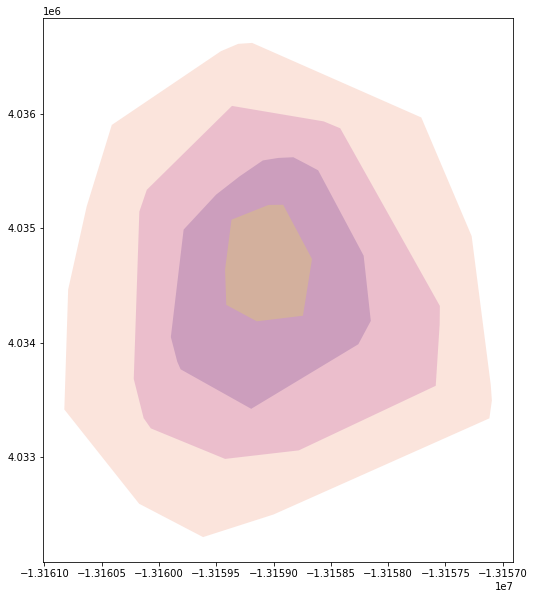

In [41]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

# Putting it all together

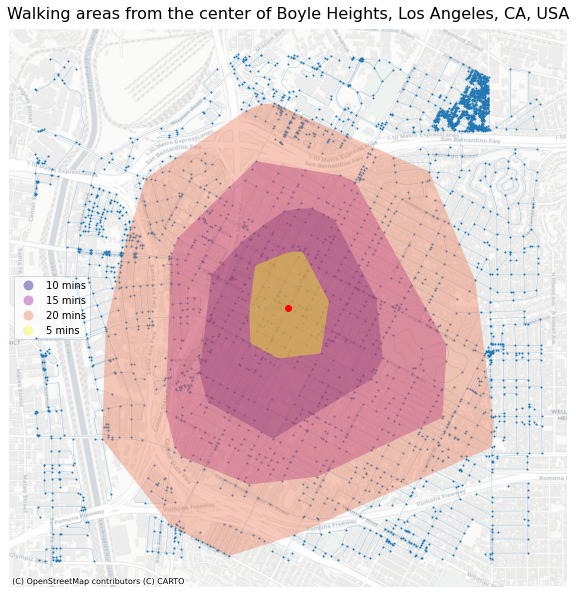

In [42]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from the center of ' + address,fontsize=16,pad=10)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# Creating "better" isochrones

![better isos](images/betterisos.png)

The material in this section has been inspired by the following sources:

- [Better Rendering of Isochrones from Network Graphs](http://kuanbutts.com/2017/12/16/osmnx-isochrones/) by Kuan Butts (Mapbox software engineer)
- [Draw an isochrone map with OSMnx](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/13-isolines-isochrones.ipynb) by Geoff Boeing

In [43]:
# additional libraries for geometry shapes
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch

In [44]:
# function to create "better" isochrones
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

In [45]:
# call function to create "better" isochrones for G
isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)

In [46]:
# Create an empty geopandas GeoDataFrame
better_isos = gpd.GeoDataFrame()
better_isos['geometry'] = None

In [47]:
# loop through the polygons and put them in a geodataframe
for i in range(len(isochrone_polys)):
    better_isos.loc[i,'geometry'] = isochrone_polys[i]
    better_isos.loc[i,'time'] =  str(trip_times[i]) + ' mins'
better_isos

,geometry,time
0,"POLYGON ((-13160226.978 4032778.862, -13160229...",20 mins
1,"POLYGON ((-13160064.669 4033229.405, -13160067...",15 mins
2,"POLYGON ((-13159616.743 4033719.284, -13159616...",10 mins
3,"POLYGON ((-13159245.475 4034263.466, -13159247...",5 mins


NameError: name 'place' is not defined

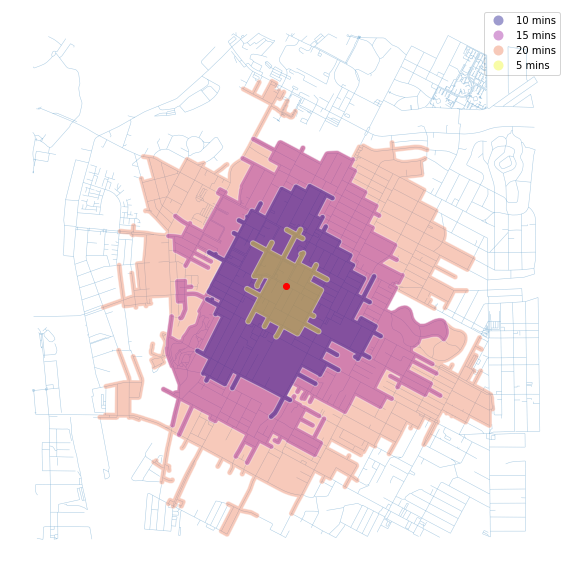

In [48]:
# create a beautiful map with all relevant layers
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
better_isos.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                edgecolor='white',
                 legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
# gdf_nodes.plot(ax=ax, 
#                markersize=1, 
#                zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from center of ' + place)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

<div class="alert alert-info">
    
<h2>Now it's your turn!</h2>

Create isochrone maps based on a new location. Make sure not to choose a huge area (e.g. "Los Angeles" or "Tokyo" will most certainly be too large for this notebook to handle). Change parameters as you like (such as travel times), and run the notebook to produce an isochrone map.

When you are done, post your results in the [class gallery](https://docs.google.com/document/d/1u1b4r6j9Av-u3LZnzE5CL_fblss7EWnEXoSBKQ_Ao9Y/edit).

</div>